# Mountain Car Method for Cart Pole #

## Description of the cross-entropy method ##

The cross entropy method is model-free, policy-based, and on-policy, which means the following:

1. It does not build any model of the environment.
2. It directly learns the policy.
3. It requires fresh data to improve the policy. 

The cross-entropy method consists of the following steps:

1. Play multiple episodes using current policy storing all transitions and total reward of each episode.
2. Throw away mediocre episodes with total reward below the selected boundary. (Usually, the worst 50% or 70% of episodes are discarded.)
3. Train on the remaining elite episodes using the states as the input and the selected actions as the desired output.



4. Repeat from step 1. until satisfied with performance.

## Imports ##

In [1]:
import gym
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\wocjan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Environment ##

In [2]:
# Create the Cart-Pole game environment
env = gym.make('MountainCar-v0')

def compute_modified_reward(next_state):
    modified_reward = np.square(max(0, next_state[0] + 0.5))
    if next_state[0] >= 0.5: 
        modified_reward += 1.0
    return modified_reward

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## Hyperparameters ##

In [3]:
# Environment parameters
state_size = 2
action_size = 3

hidden_layer_size = 128

batch_size = 10

learning_rate = 0.0025

max_episodes = 100

max_steps = 200
percentile = 80

## Neural network ##

In [4]:
class Net:
    def __init__(self, 
                 state_size = state_size, 
                 action_size = action_size, 
                 hidden_layer_size = hidden_layer_size,
                 learning_rate = learning_rate, 
                 name = 'net'):
        
        with tf.variable_scope(name):
        
            ### Prediction part
        
            # Input layer, state s is input
            self.states = tf.placeholder(
                tf.float32, 
                [None, state_size])
            
            # Hidden layer, ReLU activation
            self.hidden_layer = tf.contrib.layers.fully_connected(
                self.states, 
                hidden_layer_size)
            
            # Hidden layer, linear activation, logits
            self.logits = tf.contrib.layers.fully_connected(
                self.hidden_layer, 
                action_size,
                activation_fn = None)
            
            # Output layer, softmax activation yields probability distribution for actions
            self.probabilities = tf.nn.softmax(self.logits)
    
            ### Training part 
    
            # Action a
            self.actions = tf.placeholder(
                tf.int32, 
                [None])
            
            # One-hot encoded action a 
            #
            # encoded_action_vector = [1, 0] if action a = 0
            # encoded_action_vector = [0, 1] if action a = 1
            self.one_hot_actions = tf.one_hot(
                self.actions, 
                action_size)

            # cross entropy
            self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(
                logits = self.logits, 
                labels = self.one_hot_actions)
            
            # cost
            self.cost = tf.reduce_mean(self.cross_entropy)
            
            # Optimizer
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
    # get action chosen according to current probabilistic policy
    def get_action(self, state):
        feed_dict = { self.states : np.array([state]) } 
        probabilities = sess.run(self.probabilities, feed_dict = feed_dict)
        
        return np.random.choice(action_size, p=probabilities[0])
    
    # train based on batch
    def train(self, batch):
        states, actions = zip(*batch)
        states = np.array(states)
        actions = np.array(actions)
        
        feed_dict = {
            self.states : states,
            self.actions : actions
        }
        
        sess.run(self.optimizer, feed_dict = feed_dict)

## Training ##

In [5]:
tf.reset_default_graph()
net = Net(name = 'net',
          hidden_layer_size = hidden_layer_size,
          learning_rate = learning_rate)

learning step: 1
learning step: 2
learning step: 3
learning step: 4
learning step: 5
learning step: 6
learning step: 7
learning step: 8
learning step: 9
learning step: 10

Total reward:       -200.0
Leftmost position:  -0.8836938478913862
Rightmost position: -0.24067372576064194
Difference:         0.6430201221307442


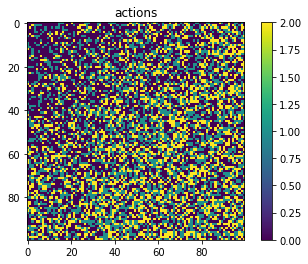

learning step: 11
learning step: 12
learning step: 13
learning step: 14
learning step: 15
learning step: 16
learning step: 17
learning step: 18
learning step: 19
learning step: 20

Total reward:       -200.0
Leftmost position:  -0.8755912849696881
Rightmost position: -0.31227795118060137
Difference:         0.5633133337890868


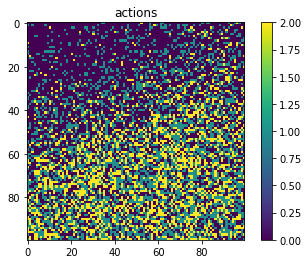

learning step: 21
learning step: 22
learning step: 23
learning step: 24
learning step: 25
learning step: 26
learning step: 27
learning step: 28
learning step: 29
learning step: 30

Total reward:       -200.0
Leftmost position:  -1.2
Rightmost position: 0.0024190179351223774
Difference:         1.2024190179351224


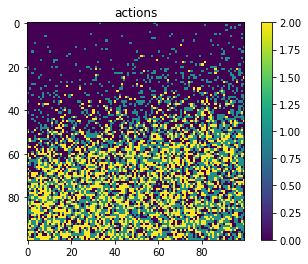

learning step: 31
learning step: 32
learning step: 33
learning step: 34
learning step: 35
learning step: 36
learning step: 37
learning step: 38
learning step: 39
learning step: 40

Total reward:       -172.0
Leftmost position:  -1.0047170508341672
Rightmost position: 0.5130646999988447
Difference:         1.517781750833012


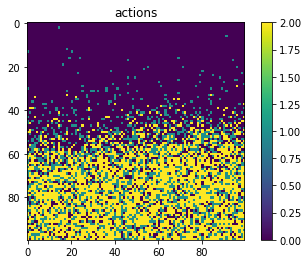

captured the flag!
learning step: 41
learning step: 42
learning step: 43
learning step: 44
learning step: 45
learning step: 46
learning step: 47
learning step: 48
learning step: 49
learning step: 50

Total reward:       -177.0
Leftmost position:  -1.2
Rightmost position: 0.5185884544969448
Difference:         1.7185884544969448


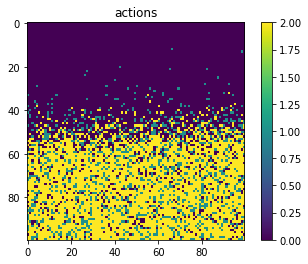

captured the flag!
learning step: 51
learning step: 52
learning step: 53
learning step: 54
learning step: 55
learning step: 56
learning step: 57
learning step: 58
learning step: 59
learning step: 60

Total reward:       -161.0
Leftmost position:  -1.2
Rightmost position: 0.5091087518161526
Difference:         1.7091087518161525


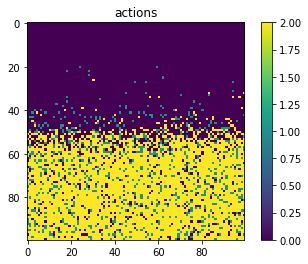

captured the flag!
learning step: 61
learning step: 62
learning step: 63
learning step: 64
learning step: 65
learning step: 66
learning step: 67
learning step: 68
learning step: 69
learning step: 70

Total reward:       -157.0
Leftmost position:  -1.2
Rightmost position: 0.5439628744365765
Difference:         1.7439628744365765


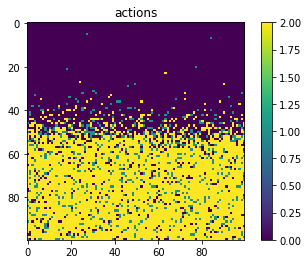

captured the flag!
learning step: 71
learning step: 72
learning step: 73
learning step: 74
learning step: 75
learning step: 76
learning step: 77
learning step: 78
learning step: 79
learning step: 80

Total reward:       -159.0
Leftmost position:  -1.2
Rightmost position: 0.5205414434728306
Difference:         1.7205414434728306


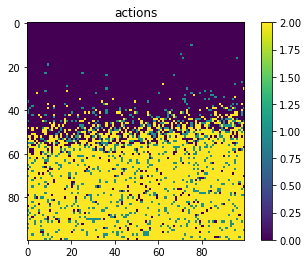

captured the flag!
learning step: 81
learning step: 82
learning step: 83
learning step: 84
learning step: 85
learning step: 86
learning step: 87
learning step: 88
learning step: 89
learning step: 90

Total reward:       -145.0
Leftmost position:  -1.2
Rightmost position: 0.5005851662331285
Difference:         1.7005851662331284


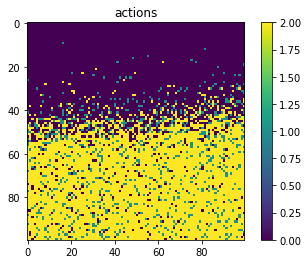

captured the flag!


KeyboardInterrupt: 

In [6]:
import random
import bisect
import time

learning_step = 0

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    
    start_index = int(max_episodes * percentile / 100)
    
    while True:

        total_reward_list = []
        trajectory_list = []

        for e in np.arange(max_episodes):
            total_reward = 0.0
            trajectory = []
            state = env.reset()
            # init min and max positions
            max_pos = state[0]
            min_pos = state[0]
            for s in np.arange(max_steps):
                action = net.get_action(state)
                next_state, reward, done, _ = env.step(action)
                # how far to the left and right did it climb?
                min_pos = min(min_pos, next_state[0])
                max_pos = max(max_pos, next_state[0])
                total_reward += reward
                trajectory.append((state, action))
                state = next_state
                if done: break
        
            # difference between the left and right most positions
            difference = max_pos - min_pos
            index = bisect.bisect(total_reward_list, difference)
            total_reward_list.insert(index, difference)
            trajectory_list.insert(index, trajectory)
        
        # keep the elite episodes, that is, throw out the bad ones 
        # train on state action pairs extracted from the elite episodes
        # this code is not optimized, it can be cleaned up 
        state_action_pairs = []
        for trajectory in trajectory_list[start_index:]:
            for state_action_pair in trajectory:
                state_action_pairs.append(state_action_pair)
        # shuffle to avoid correlations between adjacent states
        random.shuffle(state_action_pairs) 
        n = len(state_action_pairs)
        batches = [state_action_pairs[k:k + batch_size] for k in np.arange(0, n, batch_size)]

        for batch in batches:
            net.train(batch)

        learning_step += 1
        
        # test agent only after 10 learning steps, a learning step consists of training on
        # the elite episodes
        
        print("learning step:", learning_step)
        
        if learning_step % 10 == 0:     
            # test agent
            state = env.reset()
            max_pos = state[0]
            min_pos = state[0]
            env.render()
            time.sleep(0.05)
            total_reward = 0.0
            for s in np.arange(max_steps):
                action = net.get_action(state)
                state, reward, done, _ = env.step(action)
                min_pos = min(min_pos, state[0])
                max_pos = max(max_pos, state[0])
                total_reward += reward
                env.render()
                time.sleep(0.05)
                if done: break

            env.close()
            print()
            print("Total reward:      ", total_reward)
            print("Leftmost position: ", min_pos)
            print("Rightmost position:", max_pos)
            print("Difference:        ", max_pos - min_pos)

            positions = np.linspace(-1.2, 0.6, 100)
            velocities = np.linspace(-0.07, 0.07, 100)
            
            actions = np.array(
                [[net.get_action([p, v]) for p in positions] for v in velocities])
            
            plt.figure()
            plt.title('actions')
            p = plt.imshow(actions)
            plt.colorbar(p)
            plt.show()
            
            if total_reward > -200.0:
                print("captured the flag!")
                #break    